<a href="https://colab.research.google.com/github/SyedHuzaifa007/PIAIC-Deep-Learning-Assignments/blob/main/Concrete_Strength_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Compresive Strength Concrete Problem


### Abstract: 

Concrete is the most important material in civil engineering. The concrete compressive strength (concrete strength to bear the load) is a highly nonlinear function of age and ingredients.  <br><br>

<table border="1"  cellpadding="6" bordercolor="red">
	<tbody>
        <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">1030</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Physical</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">
    <tbody>
        <tr>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
            <td><p class="normal">Real</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
            <td><p class="normal">9</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
            <td><p class="normal">2007-08-03</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">	
    <tbody>
    <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Regression</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">231464</p></td>
	</tr>
    </tbody>
    </table>

###  Description:
| Features Name | Data Type | Measurement | Description |
| -- | -- | -- | -- |
Cement (component 1) | quantitative | kg in a m3 mixture | Input Variable
Blast Furnace Slag (component 2) | quantitative | kg in a m3 mixture | Input Variable
Fly Ash (component 3) | quantitative | kg in a m3 mixture | Input Variable
Water (component 4) | quantitative | kg in a m3 mixture | Input Variable
Superplasticizer (component 5) | quantitative | kg in a m3 mixture | Input Variable
Coarse Aggregate (component 6) | quantitative | kg in a m3 mixture | Input Variable
Fine Aggregate (component 7) | quantitative | kg in a m3 mixture | Input Variable
Age | quantitative | Day (1~365) | Input Variable
Concrete compressive strength | quantitative | MPa | Output Variable

### WORKFLOW :
- Load Data
- Check Missing Values ( If Exist ; Fill each record with mean of its feature )
- Standardized the Input Variables. **Hint**: Centeralized the data
- Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).
- Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).
- Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
- Train the Model with Epochs (100) and validate it
- If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .
- Evaluation Step
- Prediction


# Load Data:
[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/compresive_strength_concrete.csv)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importing Modules
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import seaborn as sns

In [4]:
# Loading Data
df = pd.read_csv("/content/drive/MyDrive/ML_Datasets/compresive_strength_concrete.csv")
df

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [5]:
# Shuffling Data
df.sample(frac=1)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
833,152.0,178.0,139.0,168.0,18.0,944.0,695.0,28,36.35
992,143.6,0.0,174.9,158.4,17.9,942.7,844.5,28,15.42
407,165.0,128.5,132.1,175.1,8.1,1005.8,746.6,3,19.42
688,108.3,162.4,0.0,203.5,0.0,938.2,849.0,3,2.33
815,525.0,0.0,0.0,189.0,0.0,1125.0,613.0,3,33.80
...,...,...,...,...,...,...,...,...,...
782,296.0,0.0,0.0,192.0,0.0,1085.0,765.0,28,21.65
895,260.0,101.0,78.0,171.0,10.0,936.0,763.0,28,49.77
503,491.0,26.0,123.0,210.0,3.9,882.0,699.0,56,59.59
281,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,28,32.66


In [6]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cement (component 1)(kg in a m^3 mixture),1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
Blast Furnace Slag (component 2)(kg in a m^3 mixture),1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
Fly Ash (component 3)(kg in a m^3 mixture),1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
Water (component 4)(kg in a m^3 mixture),1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
Superplasticizer (component 5)(kg in a m^3 mixture),1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
Coarse Aggregate (component 6)(kg in a m^3 mixture),1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
Fine Aggregate (component 7)(kg in a m^3 mixture),1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
Age (day),1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
"Concrete compressive strength(MPa, megapascals)",1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [8]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [9]:
# Renaming The Columns
columns = {
    'Cement (component 1)(kg in a m^3 mixture)':'Cement',
    'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':'Blast_Furnance_Slag',
    'Fly Ash (component 3)(kg in a m^3 mixture)':'Fly_Ash',
    'Water  (component 4)(kg in a m^3 mixture)':'Water',
    'Superplasticizer (component 5)(kg in a m^3 mixture)':'Super_Plasticizer',
    'Coarse Aggregate  (component 6)(kg in a m^3 mixture)':'Coarse_Aggregate',
    'Fine Aggregate (component 7)(kg in a m^3 mixture)':'Fine_Aggregate',
    'Age (day)':'Age',
    'Concrete compressive strength(MPa, megapascals) ':'Concrete_Strength'
    }
  
df.rename(columns = columns, inplace=True)

In [10]:
df

,Cement,Blast_Furnance_Slag,Fly_Ash,Water,Super_Plasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


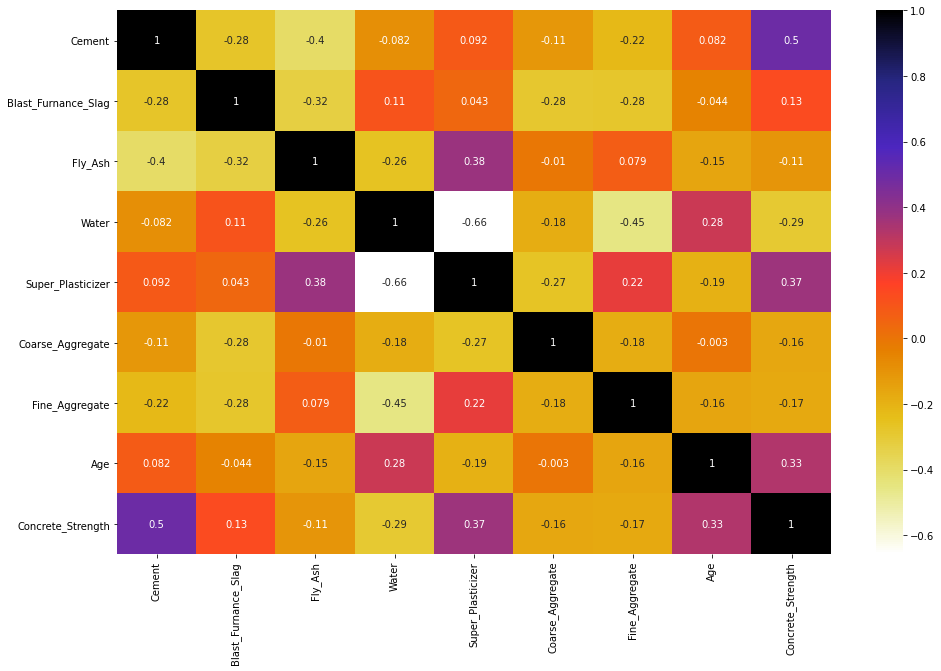

In [11]:
# Making A HeatMap of Correlations
correlations = df.corr()
plt.figure(figsize=(16,10))
sns.heatmap(correlations, cmap="CMRmap_r", annot = True)
plt.show()

In [12]:
df.shape

(1030, 9)

In [13]:
# Splitting The Dataset Into Testing and Training Data
train_data = df.iloc[:515,:]
train_data.head()

,Cement,Blast_Furnance_Slag,Fly_Ash,Water,Super_Plasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [14]:
train_data.shape

(515, 9)

In [15]:
test_data = df.iloc[515:,:]
test_data

,Cement,Blast_Furnance_Slag,Fly_Ash,Water,Super_Plasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_Strength
515,202.0,11.0,141.0,206.0,1.7,942.0,801.0,28,21.97
516,202.0,11.0,141.0,206.0,1.7,942.0,801.0,3,9.85
517,202.0,11.0,141.0,206.0,1.7,942.0,801.0,7,15.07
518,202.0,11.0,141.0,206.0,1.7,942.0,801.0,56,23.25
519,284.0,15.0,141.0,179.0,5.5,842.0,801.0,28,43.73
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [16]:
test_data.shape

(515, 9)

In [17]:
train_labels = train_data.pop('Concrete_Strength')

In [18]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Cement,515.0,297.834369,104.514262,139.6,212.60,266.0,380.0,540.0
Blast_Furnance_Slag,515.0,64.091845,75.979661,0.0,0.00,24.0,114.0,282.8
Fly_Ash,515.0,69.889320,62.704434,0.0,0.00,94.6,122.0,174.7
Water,515.0,173.701359,24.698668,121.8,157.95,166.6,187.4,228.0
Super_Plasticizer,515.0,8.619029,5.908984,0.0,5.30,8.7,11.6,32.2
Coarse_Aggregate,515.0,980.072816,74.143203,801.0,932.00,987.8,1043.6,1145.0
Fine_Aggregate,515.0,779.102718,86.133437,594.0,746.80,780.1,847.0,992.6
Age,515.0,52.790291,69.130556,3.0,10.50,28.0,56.0,365.0


In [19]:
test_labels = test_data.pop("Concrete_Strength")

In [19]:
train_labels

0      79.99
1      61.89
2      40.27
3      41.05
4      44.30
       ...  
510    39.00
511    65.70
512    32.11
513    40.29
514    74.36
Name: Concrete_Strength, Length: 515, dtype: float64

In [20]:
test_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Cement,515.0,264.501359,101.904622,102.0,160.1,273.0,325.80,540.0
Blast_Furnance_Slag,515.0,83.699806,94.536836,0.0,0.0,15.0,162.40,359.4
Fly_Ash,515.0,38.487379,61.427640,0.0,0.0,0.0,91.35,200.1
Water,515.0,189.433204,13.374680,127.0,184.0,192.0,195.45,247.0
Super_Plasticizer,515.0,3.790291,4.984562,0.0,0.0,0.0,8.00,22.1
Coarse_Aggregate,515.0,965.765049,80.643332,801.0,913.2,966.0,1017.10,1125.0
Fine_Aggregate,515.0,768.058252,73.408474,612.0,717.8,775.0,815.95,945.0
Age,515.0,38.533981,55.747523,1.0,7.0,28.0,28.00,365.0


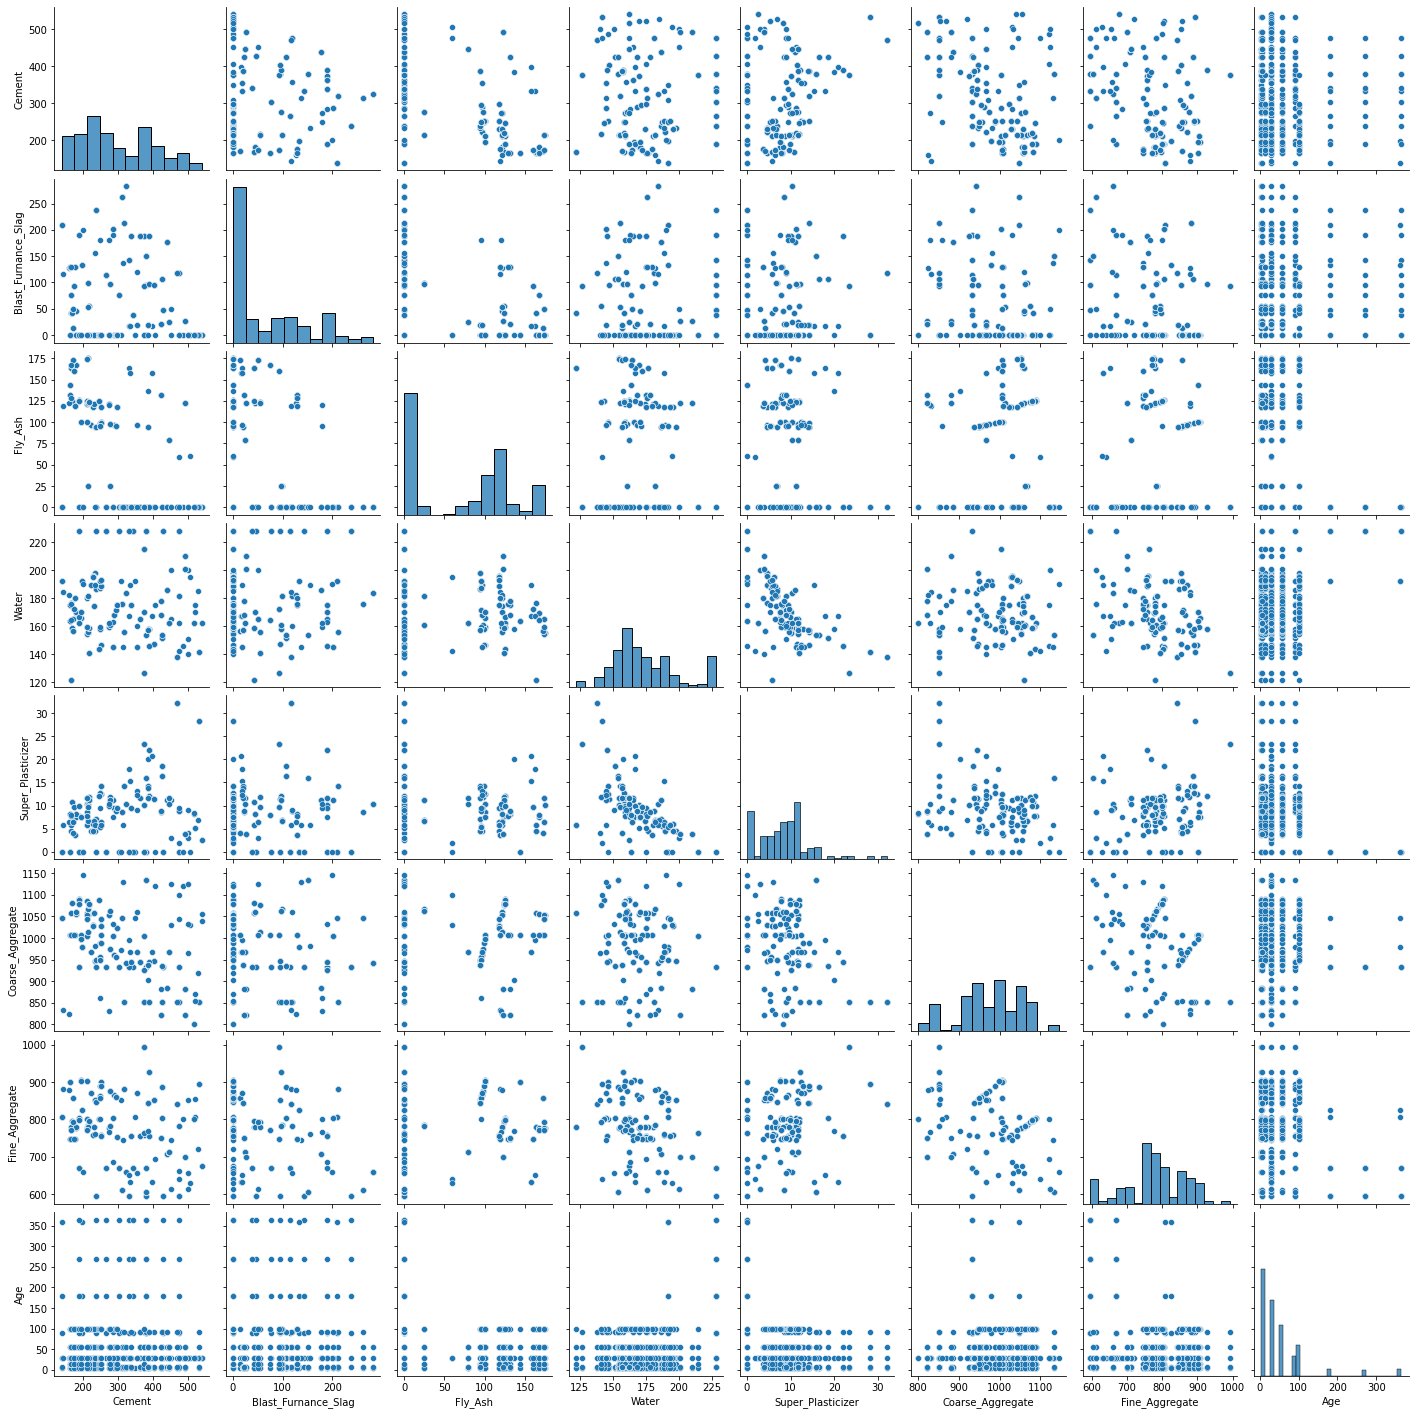

In [21]:
sns.pairplot(train_data)

In [21]:
# Normalizing The Data

# Finding Mean
train_mean = np.mean(train_data, axis = 0)
# Finding Standard Deviation
train_std = np.std(train_data, axis = 0)
# Formula Used: Data - Mean / Satandard Deviation
normal_train_data = (train_data - train_mean) / train_std
normal_test_data = (test_data - train_mean) / train_std

In [22]:
normal_train_data.head()

,Cement,Blast_Furnance_Slag,Fly_Ash,Water,Super_Plasticizer,Coarse_Aggregate,Fine_Aggregate,Age
0,2.319311,-0.844360,-1.115667,-0.474225,-1.036554,0.809049,-1.198175,-0.358950
1,2.319311,-0.844360,-1.115667,-0.474225,-1.036554,1.011556,-1.198175,-0.358950
2,0.332006,1.032966,-1.115667,2.200582,-1.460049,-0.649008,-2.151112,3.145077
3,0.332006,1.032966,-1.115667,2.200582,-1.460049,-0.649008,-2.151112,4.520624
4,-0.950405,0.899906,-1.115667,0.741596,-1.460049,-0.022584,0.539191,4.448227


In [23]:
normal_test_data.tail()

,Cement,Blast_Furnance_Slag,Fly_Ash,Water,Super_Plasticizer,Coarse_Aggregate,Fine_Aggregate,Age
1025,-0.205285,0.683849,0.325823,0.239056,0.047596,-1.484691,-0.125540,-0.35895
1026,0.233359,-0.844360,0.729695,0.903705,0.301694,-2.189418,0.398575,-0.35895
1027,-1.430231,0.992126,0.617952,0.769965,-0.426719,-1.183629,0.010427,-0.35895
1028,-1.328711,1.615266,-1.115667,0.076947,0.454152,0.128622,0.113856,-0.35895
1029,-0.353734,0.479649,0.134263,1.090131,-0.003224,-1.560294,-0.204564,-0.35895


In [24]:
# Making Model

model = tf.keras.models.Sequential()
model.add(Dense(15, activation = 'relu', input_shape = (8,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(6, activation = 'sigmoid'))
model.add(Dense(5))
model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 15)                135       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                160       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 35        
Total params: 472
Trainable params: 472
Non-trainable params: 0
_________________________________________________________________


In [25]:
# Training Model on Training Data
history = model.fit(normal_train_data, train_labels, epochs = 100)

Epoch 1/100
17/17 [==============================] - 1s 1ms/step - loss: 2104.0623 - mae: 42.6938
Epoch 2/100
17/17 [==============================] - 0s 1ms/step - loss: 2159.5490 - mae: 42.9277
Epoch 3/100
17/17 [==============================] - 0s 1ms/step - loss: 2000.3530 - mae: 41.4647
Epoch 4/100
17/17 [==============================] - 0s 1ms/step - loss: 1954.3785 - mae: 41.2162
Epoch 5/100
17/17 [==============================] - 0s 2ms/step - loss: 2045.7673 - mae: 41.9500
Epoch 6/100
17/17 [==============================] - 0s 1ms/step - loss: 2062.4238 - mae: 42.1497
Epoch 7/100
17/17 [==============================] - 0s 1ms/step - loss: 2073.7332 - mae: 42.4536
Epoch 8/100
17/17 [==============================] - 0s 1ms/step - loss: 1907.2879 - mae: 40.5278
Epoch 9/100
17/17 [==============================] - 0s 1ms/step - loss: 2005.0409 - mae: 41.4757
Epoch 10/100
17/17 [==============================] - 0s 1ms/step - loss: 1956.3663 - mae: 40.9411
Epoch 11/100
17/17 

In [26]:
# Feeding History In DataFrame 
history_df = pd.DataFrame(history.history)
history_df['epochs'] = history.epoch
history_df.tail()

,loss,mae,epochs
95,1203.555054,30.470289,95
96,1196.376831,30.357718,96
97,1189.305786,30.248936,97
98,1182.116577,30.136396,98
99,1175.144287,30.025499,99


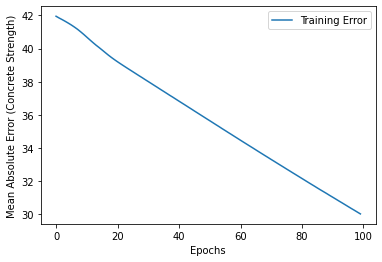

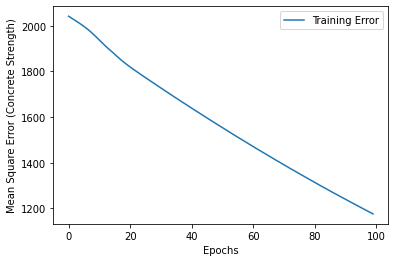

In [27]:
# plotting loss on validation data
def history_plot(history):
  # For Mean Absolute Error
  plt.figure()
  plt.xlabel('Epochs')
  plt.ylabel('Mean Absolute Error (Concrete Strength)')
  plt.plot(history_df['epochs'], history_df['mae'], label = 'Training Error')
  plt.legend()
  # For Mean Squared Error
  plt.figure()
  plt.xlabel('Epochs')
  plt.ylabel('Mean Square Error (Concrete Strength)')
  plt.plot(history_df['epochs'], history_df['loss'], label = 'Training Error')
  plt.legend()

history_plot(history)

In [28]:
# Making Predictions on Test Data
model.predict(test_data)

array([[12.136291 , 11.8230915, 12.324437 , 12.8057785, 13.430231 ],
       [12.136291 , 11.8230915, 12.324437 , 12.8057785, 13.430231 ],
       [12.136291 , 11.8230915, 12.324437 , 12.8057785, 13.430231 ],
       ...,
       [12.136291 , 11.8230915, 12.324437 , 12.8057785, 13.430231 ],
       [12.136291 , 11.8230915, 12.324437 , 12.8057785, 13.430231 ],
       [12.136291 , 11.8230915, 12.324437 , 12.8057785, 13.430231 ]],
      dtype=float32)

In [29]:
test_score = model.evaluate(test_data, test_labels)

17/17 [==============================] - 0s 1ms/step - loss: 474.1815 - mae: 17.5739


In [30]:
print(f"Mean Squared Error: {test_score[0]}")
print(f"Mean Absolute Error: {test_score[1]}")

Mean Squared Error: 474.1814880371094
Mean Absolute Error: 17.573902130126953


**Making Second Model For Validation Data**

In [31]:
#Making Second Model For Validation Data
from tensorflow.keras.models import Sequential
model2 = Sequential()
model2.add(Dense(10, activation='relu', input_shape = (8,)))
model2.add(Dense(8, activation='relu'))
model2.add(Dense(6, activation='relu'))
model2.add(Dense(5))
model2.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 10)                90        
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_7 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_8 (Dense)              (None, 5)                 35        
Total params: 267
Trainable params: 267
Non-trainable params: 0
_________________________________________________________________


In [32]:
history_1 = model2.fit(normal_train_data, train_labels, epochs=100, verbose = 0, validation_split=0.2)

In [33]:
# Feeding history_1 In DataFrame
history_1_df = pd.DataFrame(history_1.history)
history_1_df['epochs'] = history.epoch
history_1_df

,loss,mae,val_loss,val_mae,epochs
0,2122.065186,42.655624,1817.467651,40.257618,0
1,2114.155029,42.566540,1810.986694,40.175289,1
2,2105.985840,42.472820,1803.983032,40.086472,2
3,2096.292969,42.363747,1795.993286,39.985130,3
4,2084.854980,42.235970,1787.305542,39.875042,4
...,...,...,...,...,...
95,173.104248,10.731861,282.756744,13.517449,95
96,171.802216,10.678657,278.899231,13.415278,96
97,170.931717,10.639420,279.454895,13.435887,97
98,169.885712,10.621102,277.769531,13.391969,98


In [34]:
exp_batch = normal_train_data[:10]
exp_result = model2.predict(exp_batch)
exp_result

array([[59.40814 , 59.28692 , 57.61303 , 59.875713, 61.93062 ],
       [60.307137, 60.152523, 58.44453 , 60.781067, 62.83368 ],
       [52.655155, 52.380478, 52.50575 , 52.53166 , 51.97032 ],
       [60.056747, 59.417053, 59.66822 , 59.62709 , 58.39604 ],
       [61.188725, 61.302002, 61.960552, 60.171997, 59.427643],
       [34.485474, 34.720055, 35.090504, 34.635563, 34.478745],
       [61.91052 , 61.039005, 61.152397, 61.41943 , 60.068108],
       [39.082386, 39.274174, 38.6124  , 39.38291 , 40.567795],
       [30.661327, 31.116219, 31.33772 , 30.942022, 31.29301 ],
       [41.17675 , 41.023228, 40.2429  , 41.494286, 42.372066]],
      dtype=float32)

In [35]:
test1_score = model2.evaluate(test_data, test_labels)

17/17 [==============================] - 0s 1ms/step - loss: 117453968.0000 - mae: 10763.0166


In [36]:
print(f"Loss: {test1_score[0]}")
print(f"Mean Absolute Error: {test1_score[1]}")

Loss: 117453968.0
Mean Absolute Error: 10763.0166015625


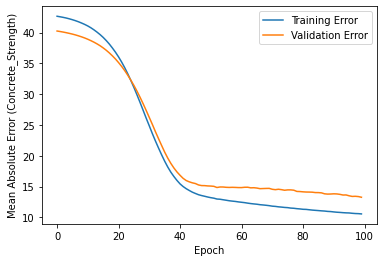

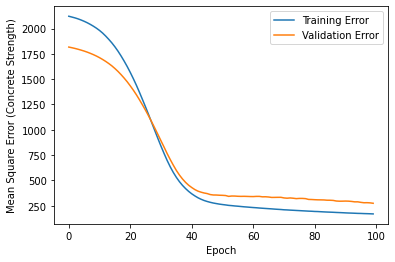

In [40]:
# Plotting Loss on Validation Data
# plot loss on validation data
def plot_history1(history_1):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Absolute Error (Concrete_Strength)')
  plt.plot(history_1_df['epochs'], history_1_df['mae'], label = 'Training Error')
  plt.plot(history_1_df['epochs'], history_1_df['val_mae'], label = 'Validation Error')
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error (Concrete Strength)')
  plt.plot(history_1_df['epochs'], history_1_df['loss'], label = 'Training Error')
  plt.plot(history_1_df['epochs'], history_1_df['val_loss'], label = 'Validation Error')
  plt.legend()

plot_history1(history_1)